# KEN3450, Data Analysis 2020 

**Kaggle Competition 2020**<br>

Data Exploration

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

#import your classifiers here

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Read the data, clean and explore the data

There are a large number of missing values in the data. Nearly all predictors have some degree of missingness. Not all missingness are alike: NaN in the `'pregnancy'` column is meaningful and informative, as patients with NaN's in the pregnancy column are males, where as NaN's in other predictors may appear randomly. 


**What do you do?:** We make no attempt to interpret the predictors and we make no attempt to model the missing values in the data in any meaningful way. We replace all missing values with 0.

However, it would be more complete to look at the data and allow the data to inform your decision on how to address missingness. For columns where NaN values are informative, you might want to treat NaN as a distinct value; You might want to drop predictors with too many missing values and impute the ones with few missing values using a model. There are many acceptable strategies here, as long as the appropriateness of the method in the context of the task and the data is discussed.

In [5]:
#Train
df = pd.read_csv('data/flu_train.csv')
df = df[~np.isnan(df['flu'])]  # Just making sure that our target attribute has no missing values
print(df.shape)
df.describe()

(5246, 72)


,ID,Age,HHIncomeMid,Poverty,HomeRooms,Weight,Length,HeadCirc,Height,BMI,...,CompHrsDayChild,AlcoholDay,AlcoholYear,SmokeAge,AgeFirstMarij,AgeRegMarij,SexAge,SexNumPartnLife,SexNumPartYear,flu
count,5246.000000,5246.000000,4798.000000,4843.000000,5210.000000,5206.000000,356.000000,61.000000,5014.000000,5010.000000,...,417.000000,2404.000000,2882.000000,1479.000000,1331.000000,629.000000,2673.000000,2773.000000,2405.000000,5246.000000
mean,61707.937286,35.078155,54079.824927,2.614229,6.147025,68.701921,84.363483,41.101639,160.341424,26.371601,...,2.225420,2.959651,72.353921,17.939148,16.983471,17.545310,17.456042,14.617021,1.354678,0.059093
std,5876.826538,23.032443,32956.594998,1.672579,2.223687,29.774856,13.827255,2.381561,21.043275,7.464134,...,2.517635,3.522538,101.779814,5.452497,3.874501,4.478533,3.740811,61.385945,2.503281,0.235820
min,51624.000000,0.000000,2500.000000,0.000000,1.000000,2.800000,47.100000,34.200000,83.600000,12.880000,...,0.000000,1.000000,0.000000,6.000000,1.000000,5.000000,9.000000,0.000000,0.000000,0.000000
25%,56623.250000,15.000000,22500.000000,1.110000,5.000000,53.000000,73.950000,39.600000,155.400000,21.200000,...,0.000000,1.000000,3.000000,15.000000,15.000000,15.000000,15.000000,2.000000,1.000000,0.000000
50%,61669.500000,33.000000,50000.000000,2.320000,6.000000,70.600000,86.150000,41.200000,165.000000,25.700000,...,1.000000,2.000000,24.000000,17.000000,16.000000,17.000000,17.000000,5.000000,1.000000,0.000000
75%,66841.250000,53.000000,87500.000000,4.340000,7.000000,87.300000,95.325000,42.900000,173.600000,30.500000,...,6.000000,3.000000,104.000000,19.000000,18.000000,19.000000,19.000000,12.000000,1.000000,0.000000
max,71915.000000,80.000000,100000.000000,5.000000,13.000000,223.000000,112.200000,45.400000,200.400000,80.600000,...,6.000000,82.000000,364.000000,72.000000,48.000000,52.000000,50.000000,2000.000000,69.000000,1.000000


In [3]:
#Test
df_test = pd.read_csv('data/flu_test.csv')
print(df_test.shape)
df_test.head()

(1533, 71)


,ID,Gender,Age,Race1,Education,MaritalStatus,HHIncome,HHIncomeMid,Poverty,HomeRooms,...,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
0,51625,male,4,Other,NaN,NaN,20000-24999,22500.0,1.07,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51678,male,60,White,High School,Married,15000-19999,17500.0,1.03,5.0,...,NaN,NaN,No,Yes,20.0,1.0,NaN,No,NaN,NaN
2,51694,male,38,White,Some College,Married,20000-24999,22500.0,1.15,6.0,...,No,NaN,No,Yes,23.0,1.0,1.0,No,Heterosexual,NaN
3,51695,male,8,White,NaN,NaN,65000-74999,70000.0,3.55,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51711,female,59,Other,8th Grade,Widowed,20000-24999,22500.0,1.37,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#What's up in each set

x = df.values[:, :-1]
y = df.values[:, -1]

x_test = df_test.values[:, :-1]

print('x train shape:', x.shape)
print('x test shape:', x_test.shape)
print('train class 0: {}, train class 1: {}'.format(len(y[y==0]), len(y[y==1])))
print('The percentage of flu in training is {:.3f}%'.format((100*len(y[y==1])/(len(y[y==1])+len(y[y==0])))))

x train shape: (5246, 71)
x test shape: (1533, 70)
train class 0: 4936, train class 1: 310
The percentage of flu in training is 5.909%


### Let's check the attributes of the train dataframe ###

In [5]:
for col in df.columns:
    print(col, df[col].dtypes)

ID int64
Gender object
Age int64
Race1 object
Education object
MaritalStatus object
HHIncome object
HHIncomeMid float64
Poverty float64
HomeRooms float64
HomeOwn object
Work object
Weight float64
Length float64
HeadCirc float64
Height float64
BMI float64
BMICatUnder20yrs object
BMI_WHO object
Pulse float64
BPSysAve float64
BPDiaAve float64
BPSys1 float64
BPDia1 float64
BPSys2 float64
BPDia2 float64
BPSys3 float64
BPDia3 float64
Testosterone float64
DirectChol float64
TotChol float64
UrineVol1 float64
UrineFlow1 float64
UrineVol2 float64
UrineFlow2 float64
Diabetes object
DiabetesAge float64
HealthGen object
DaysMentHlthBad float64
LittleInterest object
Depressed object
nPregnancies float64
nBabies float64
Age1stBaby float64
SleepHrsNight float64
SleepTrouble object
PhysActive object
PhysActiveDays float64
TVHrsDay object
CompHrsDay object
TVHrsDayChild float64
CompHrsDayChild float64
Alcohol12PlusYr object
AlcoholDay float64
AlcoholYear float64
SmokeNow object
Smoke100 object
Smoke100n

#### Gender ####

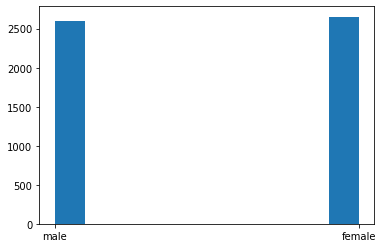

In [6]:
df['Gender'].hist()
plt.grid(False)

Very balanced for gender --> Only "male" or "female"

In [7]:
df[df['Gender'].isna()].shape[0]

0

There are no missing values. We can convert the column into one called `female` where there is a 1 if the person is a female, and a 0 if the person is a male.

In [8]:
df['female'] = (df['Gender'] == 'female').astype(int)
df = df.drop(columns='Gender')

#### Age ####

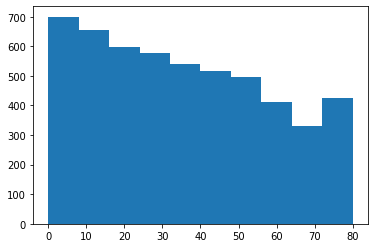

In [9]:
df['Age'].hist()
plt.grid(False)

In [10]:
df['Age'].describe()

count    5246.000000
mean       35.078155
std        23.032443
min         0.000000
25%        15.000000
50%        33.000000
75%        53.000000
max        80.000000
Name: Age, dtype: float64

In [11]:
df[df['Age'].isna()].shape[0]

0

#### Race1 ####

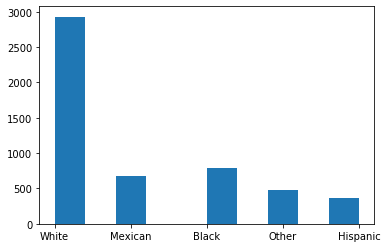

In [12]:
df['Race1'].hist()
plt.grid(False)

In [13]:
df[df['Race1'].isna()].shape[0]

0

In [14]:
dummy = pd.get_dummies(df['Race1'], prefix='race')
dummy = dummy.drop(columns='race_Other')
df = pd.concat([df, dummy], axis=1)
df = df.drop(columns='Race1')

#### Education ####

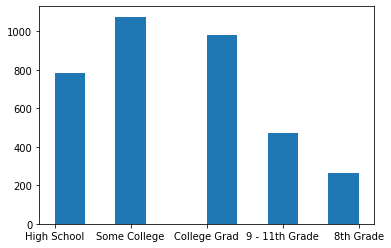

In [15]:
df['Education'].hist()
plt.grid(False)

In [16]:
df[df['Education'].isna()].shape[0]

1672

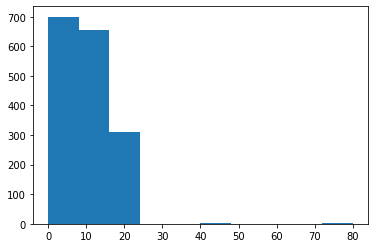

In [17]:
df[df['Education'].isna()]['Age'].hist()
plt.grid(False)

In [18]:
df[df['Education'].isna()]['Age'].describe()

count    1672.000000
mean        9.397727
std         6.498378
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        80.000000
Name: Age, dtype: float64

Most of the education is missing for very young people. We can probably work it out and fill the missing values as one of the categories above depending on the age. For babies we can just put no education. We could also include primary school, etc.

#### MaritalStatus ####

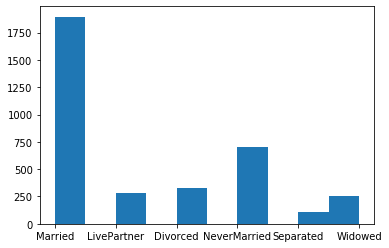

In [19]:
df['MaritalStatus'].hist()
plt.grid(False)

In [20]:
df[df['MaritalStatus'].isna()].shape[0]

1666

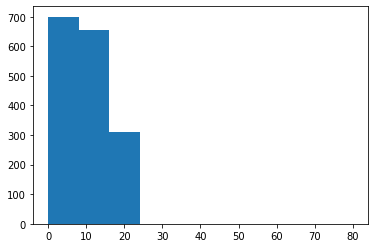

In [21]:
df[df['MaritalStatus'].isna()]['Age'].hist()
plt.grid(False)

In [22]:
df[df['MaritalStatus'].isna()]['Age'].describe()

count    1666.000000
mean        9.268307
std         6.050194
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        80.000000
Name: Age, dtype: float64

Missing the marital status for very young people. Fill value as *NeverMarried*.

#### HHIncome ####

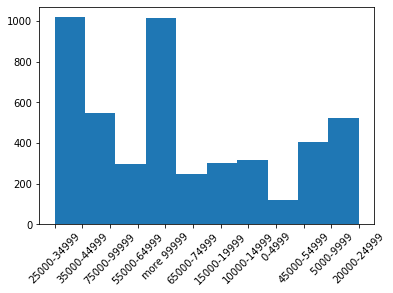

In [23]:
df.HHIncome.hist()
plt.grid(False)
plt.xticks(rotation=45);

In [24]:
df[df['HHIncome'].isna()].shape[0]

448

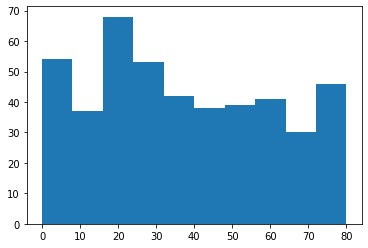

In [25]:
df[df['HHIncome'].isna()]['Age'].hist()
plt.grid(False)

In [26]:
df.HHIncome.unique()

array(['25000-34999', '35000-44999', '75000-99999', '55000-64999',
       'more 99999', '65000-74999', nan, '15000-19999', '10000-14999',
       ' 0-4999', '45000-54999', ' 5000-9999', '20000-24999'],
      dtype=object)

It's gonna be complicated to fill missing values for this. Maybe ignoring it may be best, as the poverty attribute may substitute this one.

#### HHIncomeMid ####

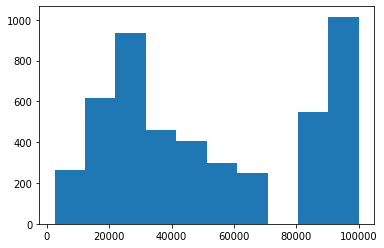

In [27]:
df.HHIncomeMid.hist()
plt.grid(False)

In [28]:
df.HHIncomeMid.describe()

count      4798.000000
mean      54079.824927
std       32956.594998
min        2500.000000
25%       22500.000000
50%       50000.000000
75%       87500.000000
max      100000.000000
Name: HHIncomeMid, dtype: float64

In [29]:
df[df['HHIncomeMid'].isna()].shape[0]

448

Same as in `HHIncome`

Complicated to fill missing values, due to polarization of richness. Maybe ignoring may be best.

#### Poverty ####

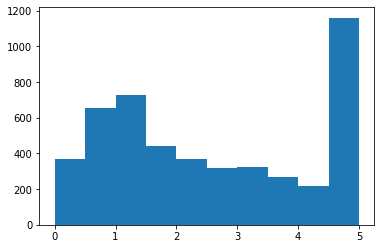

In [30]:
df['Poverty'].hist()
plt.grid(False)

In [31]:
df['Poverty'].describe()

count    4843.000000
mean        2.614229
std         1.672579
min         0.000000
25%         1.110000
50%         2.320000
75%         4.340000
max         5.000000
Name: Poverty, dtype: float64

In [32]:
df[df['Poverty'].isna()].shape[0]

403

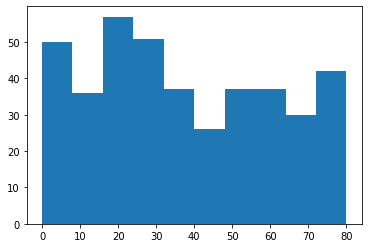

In [33]:
df[df['Poverty'].isna()]['Age'].hist()
plt.grid(False)

We can probably fill missing values with a distribution.

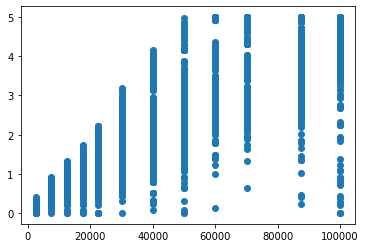

In [34]:
plt.scatter(df.HHIncomeMid, df.Poverty);

#### HomeRooms ####

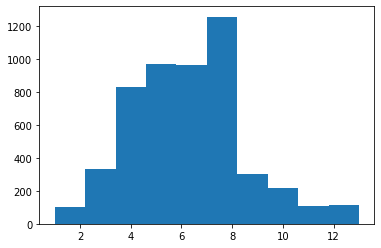

In [35]:
df['HomeRooms'].hist()
plt.grid(False)

In [36]:
df['HomeRooms'].describe()

count    5210.000000
mean        6.147025
std         2.223687
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        13.000000
Name: HomeRooms, dtype: float64

In [37]:
df[df.HomeRooms.isna()].shape[0]

36

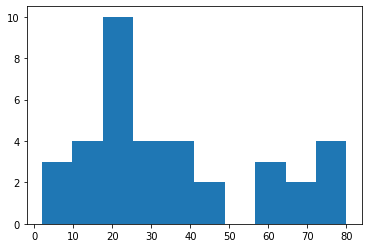

In [38]:
df[df.HomeRooms.isna()]['Age'].hist()
plt.grid(False)

This may be people who don't own a house at all. Young people leaving with their parents, living in a dorm, nursery home. Missing values for young and old people.

#### HomeOwn ####

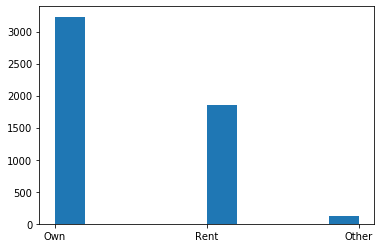

In [39]:
df.HomeOwn.hist()
plt.grid(False)

In [40]:
df[df.HomeOwn.isna()].shape[0]

33

Do we assume these people don't have a house?

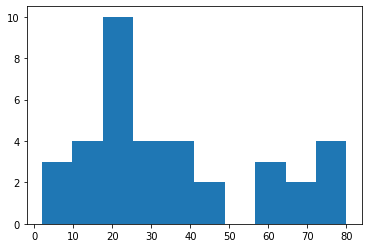

In [41]:
df[df.HomeRooms.isna()]['Age'].hist()
plt.grid(False)

This may be people who don't own a house at all. Young people leaving with their parents, living in a dorm, nursery home. Missing values for young and old people.

#### Work ####

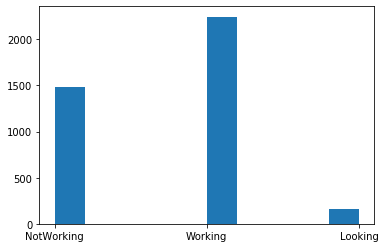

In [42]:
df.Work.hist()
plt.grid(False)

In [43]:
df[df.Work.isna()].shape[0]

1357

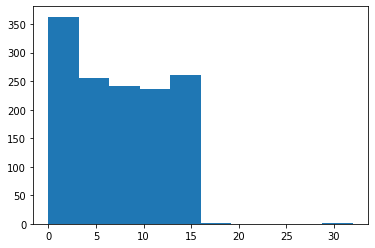

In [44]:
df[df.Work.isna()]['Age'].hist()
plt.grid(False)

In [45]:
df[df.Work.isna()]['Age'].describe()

count    1357.000000
mean        7.369197
std         4.740153
min         0.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        32.000000
Name: Age, dtype: float64

Missing values for very young people, probably never worked. We can either put them as *NotWorking* or create a new category as *NeverWorked*.

#### Weight ####

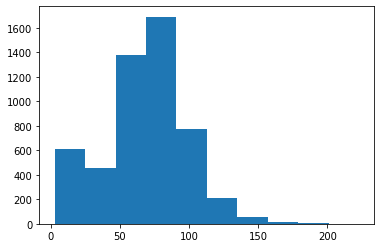

In [46]:
df.Weight.hist()
plt.grid(False)

In [47]:
df[df.Weight.isna()].shape[0]

40

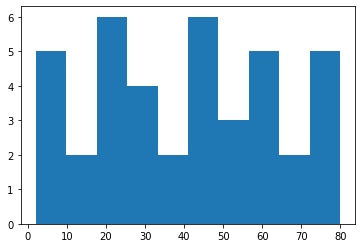

In [48]:
df[df.Weight.isna()].Age.hist()
plt.grid(False)

Either substitute according to distribution, or build a predictor for weight based on `age` and `gender`.

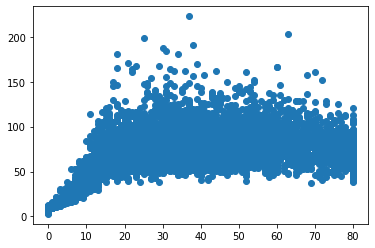

In [49]:
plt.scatter(df.Age, df.Weight);

#### Length ####

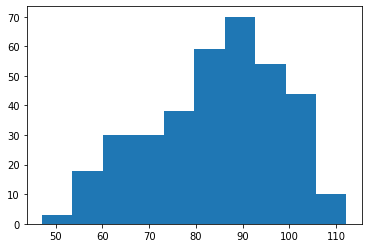

In [50]:
df.Length.hist()
plt.grid(False)

In [51]:
df[df.Length.isna()].shape[0]

4890

Most of the people's heights are missing, but we can probably work out a distribution to provide the missing values. Or build a predictor based on `age` and `gender`. Nop, ignore it because we have the `height` attribute.

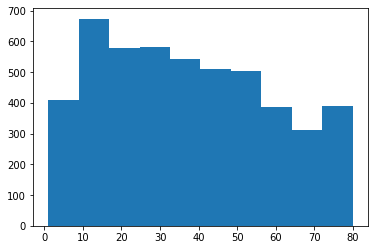

In [52]:
df[df.Length.isna()].Age.hist()
plt.grid(False)

#### HeadCirc ####

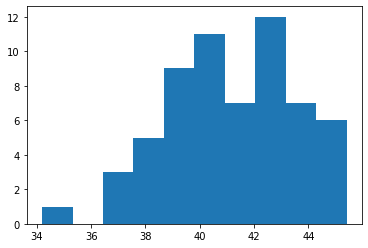

In [53]:
df.HeadCirc.hist()
plt.grid(False)

In [54]:
df[df.HeadCirc.isna()].shape[0]

5185

Almost everyone is missing this attribute. It may be better to not take it into account.

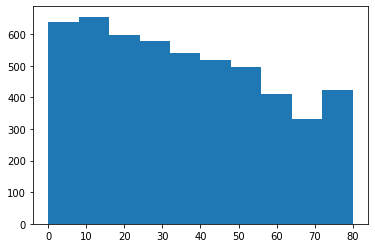

In [55]:
df[df.HeadCirc.isna()].Age.hist()
plt.grid(False)

#### Height ####

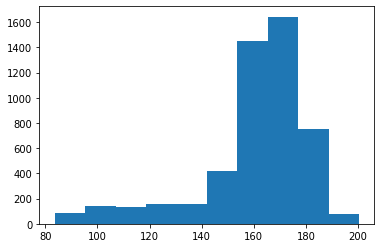

In [56]:
df.Height.hist()
plt.grid(False)

In [57]:
df[df.Height.isna()].shape[0]

232

Few missing values, fill them with distribution or predictor (based on `age` and `gender`)

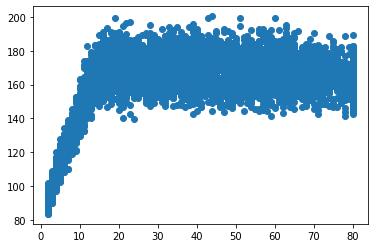

In [58]:
plt.scatter(df.Age, df.Height);

#### BMI ####

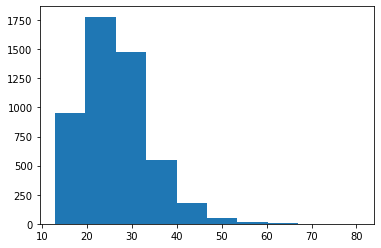

In [59]:
df.BMI.hist()
plt.grid(False)

In [60]:
df[df.BMI.isna()].shape[0]

236

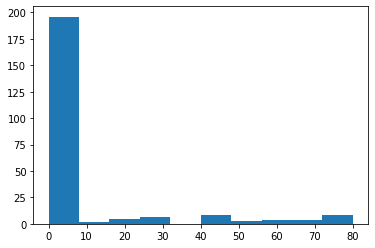

In [61]:
df[df.BMI.isna()].Age.hist()
plt.grid(False)

In [62]:
df[df.BMI.isna()].Age.describe()

count    236.000000
mean       8.601695
std       20.025363
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max       80.000000
Name: Age, dtype: float64

BMI is missing for babies, for which the formula does not apply.

BMI is calculated as $$BMI = \frac{weight \ (km)}{height^2 \ (m^2)}$$
We must be careful because height is represented in centimeters in the dataset. Once we fill the missing values for weight and height, we can fill the BMI in.

It relates weight and height, so it may be very useful.

#### BMICatUnder20yrs ####

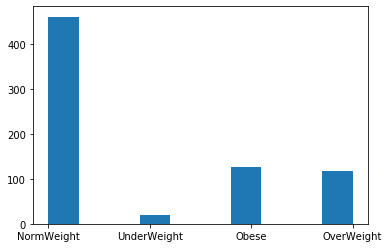

In [63]:
df.BMICatUnder20yrs.hist()
plt.grid(False)

In [64]:
df[df.BMICatUnder20yrs.isna()].shape[0]

4522

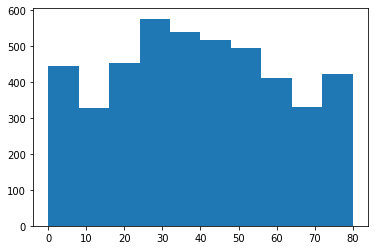

In [65]:
df[df.BMICatUnder20yrs.isna()].Age.hist()
plt.grid(False)

Too many values missing, we might just as well ignore this attribute.

#### BMI_WHO ####

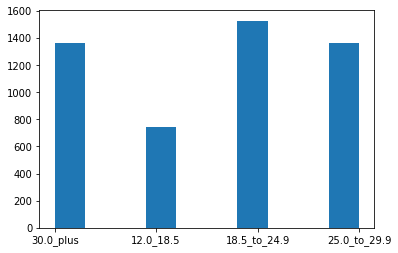

In [66]:
df.BMI_WHO.hist()
plt.grid(False)

In [67]:
df[df.BMI_WHO.isna()].shape[0]

256

This is just a reestructuring of the BMI attribute. I wonder wether we need this or not.

#### Pulse ####

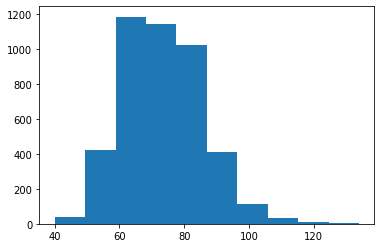

In [68]:
df.Pulse.hist()
plt.grid(False)

In [69]:
df[df.Pulse.isna()].shape[0]

870

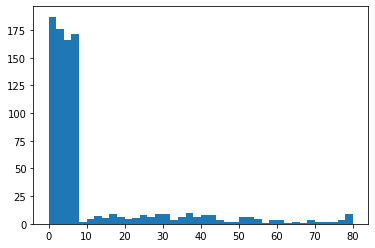

In [70]:
df[df.Pulse.isna()].Age.hist(bins=40)
plt.grid(False)

Values missing for very young people (babies probably).

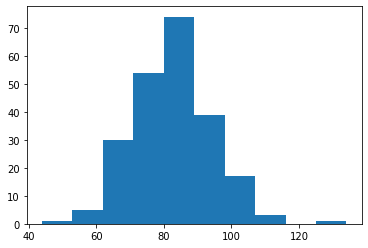

In [71]:
df[df['Age'] <= 10].Pulse.hist()
plt.grid(False)

Fill missing values for young (0-10 years) according to the distribution above.

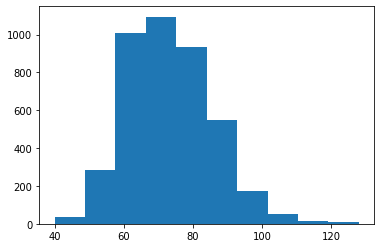

In [72]:
df[df['Age'] > 10].Pulse.hist()
plt.grid(False)

For the non-young (>10 yo) use the above distribution.

#### BPSysAve ####

In [73]:
df.BPSysAve.describe()

count    4369.000000
mean      117.683680
std        17.390216
min        76.000000
25%       106.000000
50%       115.000000
75%       127.000000
max       226.000000
Name: BPSysAve, dtype: float64

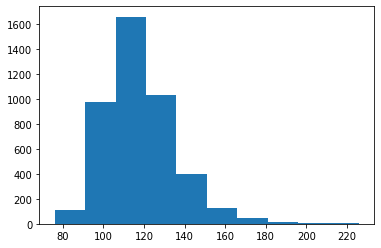

In [74]:
df.BPSysAve.hist()
plt.grid(False)

In [75]:
df[df.BPSysAve.isna()].shape[0]

877

In [76]:
df[df.BPSysAve.isna()].flu.value_counts()

0    826
1     51
Name: flu, dtype: int64

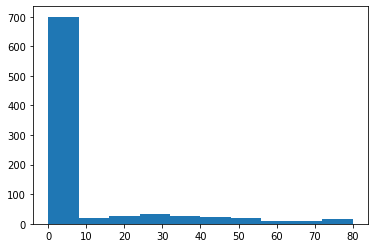

In [77]:
df[df.BPSysAve.isna()].Age.hist()
plt.grid(False)

Again for missing for babies mostly.

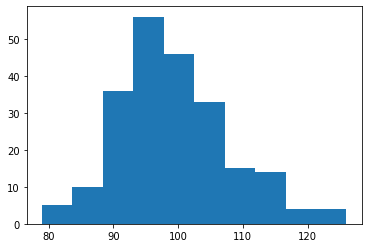

In [78]:
df[df.Age <= 10].BPSysAve.hist()
plt.grid(False)

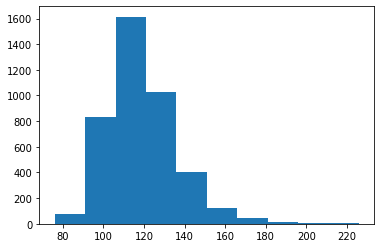

In [79]:
df[df.Age > 10].BPSysAve.hist()
plt.grid(False)

#### BPDiaAve ####

In [80]:
df.BPDiaAve.describe()

count    4369.000000
mean       66.554131
std        14.862799
min         0.000000
25%        60.000000
50%        68.000000
75%        76.000000
max       116.000000
Name: BPDiaAve, dtype: float64

0 pressure, what the hell?

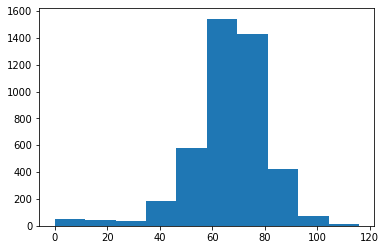

In [81]:
df.BPDiaAve.hist()
plt.grid(False)

In [82]:
df[df.BPDiaAve.isna()].shape[0]

877

Missing the exact same entries as BPSYSAve

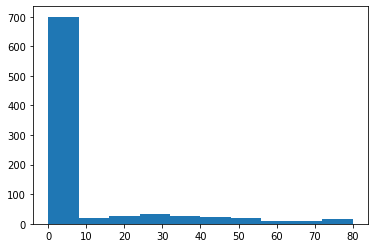

In [83]:
df[df.BPDiaAve.isna()].Age.hist()
plt.grid(False)

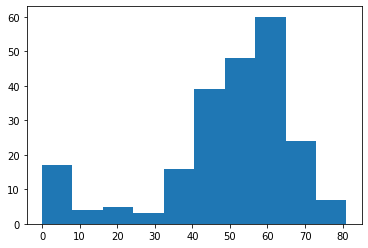

In [84]:
df[df.Age <= 10].BPDiaAve.hist()
plt.grid(False)

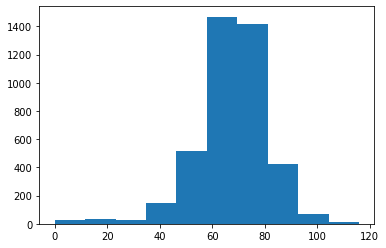

In [85]:
df[df.Age > 10].BPDiaAve.hist()
plt.grid(False)

#### BPSys1, 2, 3 and BPDia1, 2, 3 ####

This are the mesuramnents which lead to the aforementioned averages, I believe we can ignore them.

#### Testosterone ####

In [86]:
df.Testosterone.describe()

count    2008.000000
mean      190.980538
std       225.730181
min         0.250000
25%        16.905000
50%        39.090000
75%       351.765000
max      1795.600000
Name: Testosterone, dtype: float64

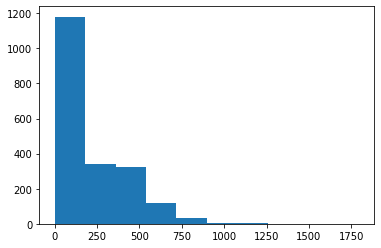

In [87]:
df.Testosterone.hist()
plt.grid(False)

In [88]:
df[df.Testosterone.isna()].shape[0]

3238

Most values are missing

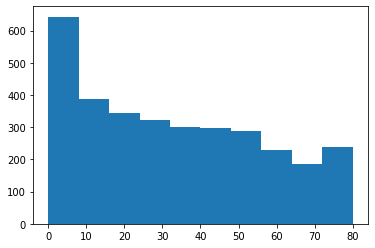

In [89]:
df[df.Testosterone.isna()].Age.hist()
plt.grid(False)

I would fit testosterone values with a distribution or ignore them directly.

#### DirectChol ####

In [90]:
df.DirectChol.describe()

count    4337.000000
mean        1.357699
std         0.387915
min         0.390000
25%         1.090000
50%         1.290000
75%         1.580000
max         4.030000
Name: DirectChol, dtype: float64

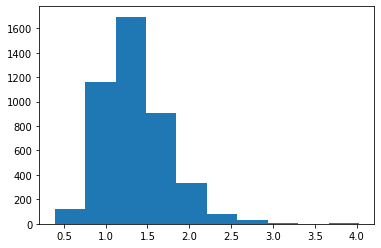

In [91]:
df.DirectChol.hist()
plt.grid(False)

In [92]:
df[df.DirectChol.isna()].shape[0]

909

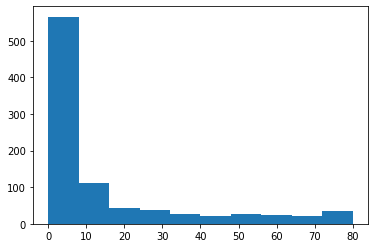

In [93]:
df[df.DirectChol.isna()].Age.hist()
plt.grid(False)

Missing mostly for very young people.

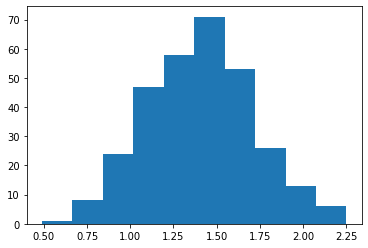

In [94]:
df[df.Age <= 10].DirectChol.hist()
plt.grid(False)

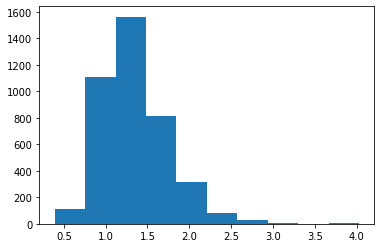

In [95]:
df[df.Age > 10].DirectChol.hist()
plt.grid(False)

#### TotChol ####

In [96]:
df.TotChol.describe()

count    4337.000000
mean        4.835764
std         1.069526
min         1.530000
25%         4.090000
50%         4.730000
75%         5.510000
max        13.650000
Name: TotChol, dtype: float64

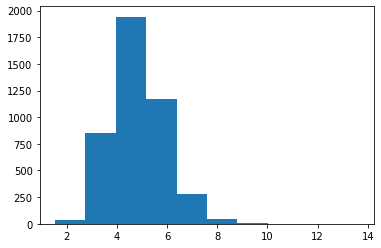

In [97]:
df.TotChol.hist()
plt.grid(False)

In [98]:
df[df.TotChol.isna()].shape[0]

909

Same instances missing as DirectChol

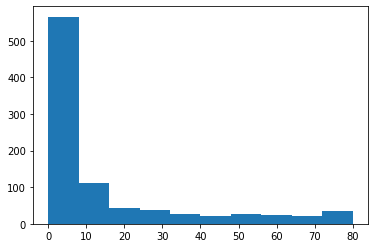

In [99]:
df[df.TotChol.isna()].Age.hist()
plt.grid(False)

Missing mostly for very young people.

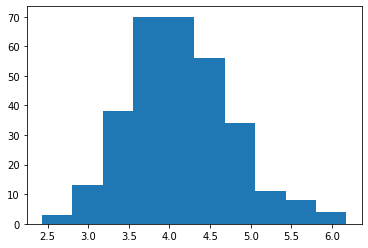

In [100]:
df[df.Age <= 10].TotChol.hist()
plt.grid(False)

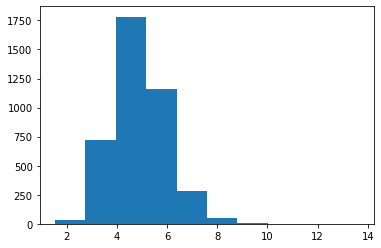

In [101]:
df[df.Age > 10].TotChol.hist()
plt.grid(False)

We can either fit with distribution, or predict from `DirectChol`.

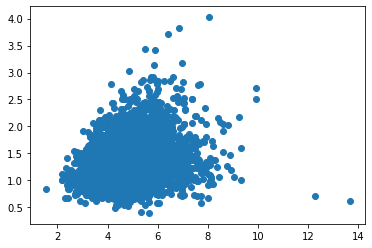

In [102]:
plt.scatter(df.TotChol, df.DirectChol);

`DirectChol` may not be a good predictor.

#### UrineVol1 , 2; UrineFlow1, 2 ####

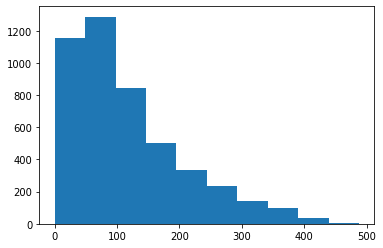

In [103]:
df.UrineVol1.hist()
plt.grid(False)

In [104]:
df[df.UrineVol1.isna()].shape[0]

609

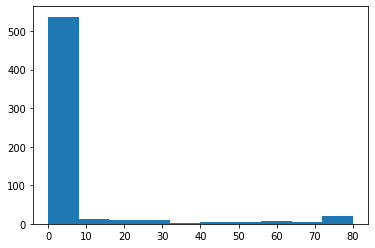

In [105]:
df[df.UrineVol1.isna()].Age.hist()
plt.grid(False)

Mostly missing for babies

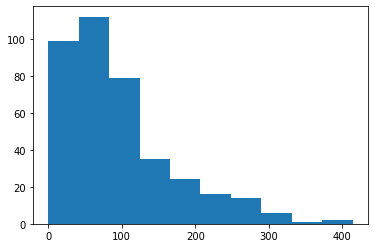

In [106]:
df[df.Age <= 10].UrineVol1.hist()
plt.grid(False)

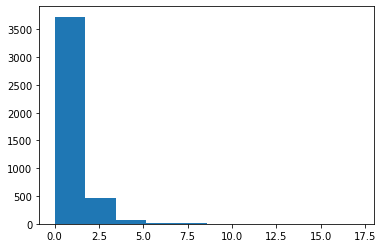

In [107]:
df.UrineFlow1.hist()
plt.grid(False)

In [108]:
df[df.UrineFlow1.isna()].shape[0]

946

Missing urine flows and volumes may be added using a distribution, or directly ignored.

#### Diabetes ####

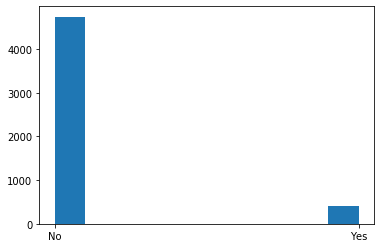

In [109]:
df.Diabetes.hist()
plt.grid(False)

In [110]:
df[df.Diabetes.isna()].shape[0]

103

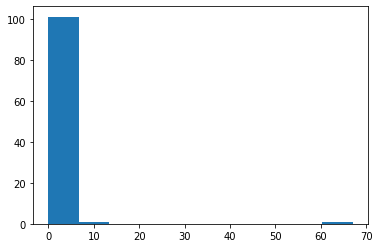

In [111]:
df[df.Diabetes.isna()].Age.hist()
plt.grid(False)

Mostly missing for babies. Based in the unbalance of the diabetes values, I believe that the best may be to ignore the attribute.

In [112]:
df[df.Diabetes == 'Yes'].flu.value_counts()

0    344
1     58
Name: flu, dtype: int64

#### DiabetesAge ####

In [113]:
df.DiabetesAge.describe()

count    330.000000
mean      49.339394
std       15.788109
min        1.000000
25%       41.000000
50%       50.000000
75%       60.000000
max       80.000000
Name: DiabetesAge, dtype: float64

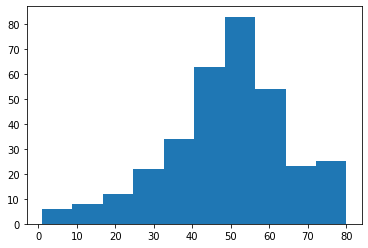

In [114]:
df.DiabetesAge.hist()
plt.grid(False)

In [115]:
df[df.DiabetesAge.isna()].shape[0]

4916

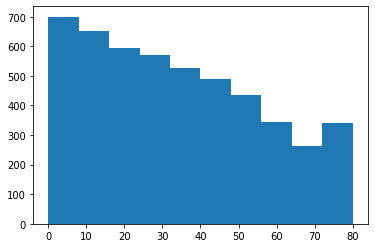

In [116]:
df[df.DiabetesAge.isna()].Age.hist()
plt.grid()

I believe that it is best to ignore this attribute.

#### HealthGen ####

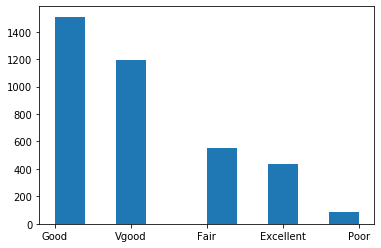

In [117]:
df.HealthGen.hist()
plt.grid(False)

In [118]:
df[df.HealthGen.isna()].shape[0]

1463

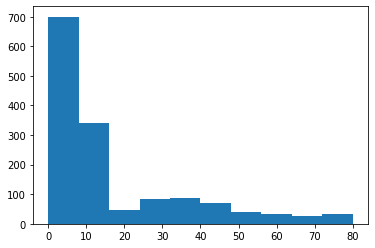

In [119]:
df[df.HealthGen.isna()].Age.hist()
plt.grid(False)

Mostly missing for babies and young people. We can fill values based on probability.

#### DaysMentHlthBad ####

In [120]:
df.DaysMentHlthBad.describe()

count    3778.000000
mean        3.946268
std         7.681957
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        30.000000
Name: DaysMentHlthBad, dtype: float64

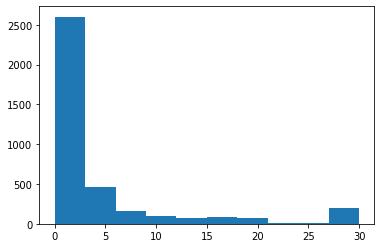

In [121]:
df.DaysMentHlthBad.hist()
plt.grid(False)

In [122]:
df[df.DaysMentHlthBad.isna()].shape[0]

1468

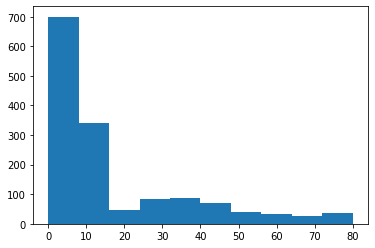

In [123]:
df[df.DaysMentHlthBad.isna()].Age.hist()
plt.grid(False)

Missing mostly for young people. We can fill values based on probability.

#### LittleInterest ####

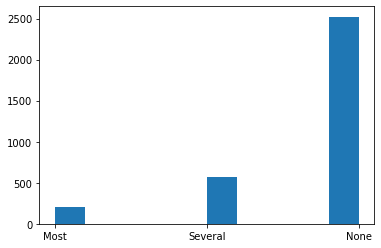

In [124]:
df.LittleInterest.hist()
plt.grid(False)

In [125]:
df[df.LittleInterest.isna()].shape[0]

1954

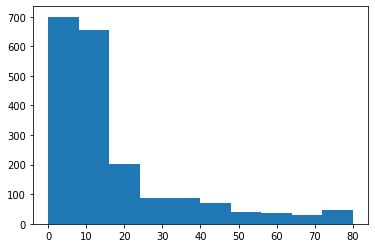

In [126]:
df[df.LittleInterest.isna()].Age.hist()
plt.grid(False)

Mostly missing in young people, we may fill based on probability.

#### Depressed ####

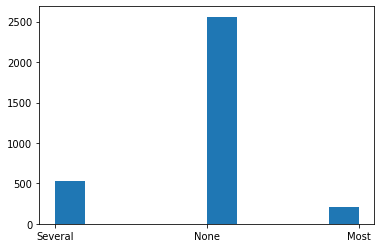

In [127]:
df.Depressed.hist()
plt.grid(False)

In [128]:
df[df.Depressed.isna()].shape[0]

1951

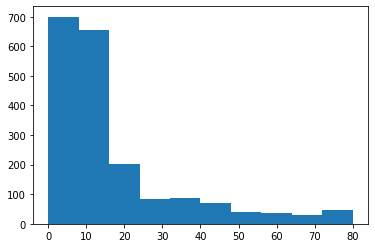

In [129]:
df[df.Depressed.isna()].Age.hist()
plt.grid(False)

Once again young people. Fill by probabiltiy.

#### nPregnancies ####
Careful, human males cannot get pregnant.

In [130]:
df.nPregnancies.describe()

count    1283.000000
mean        3.060016
std         1.738878
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: nPregnancies, dtype: float64

In [131]:
df[df.nPregnancies.isna()].shape[0]

3963

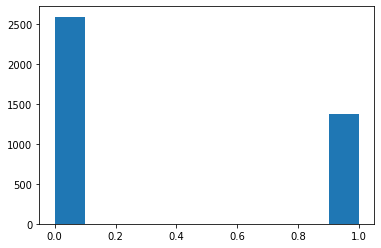

In [132]:
df[df.nPregnancies.isna()].female.hist()
plt.grid()

Mostly missing for males. Let's see for females how do we carry this out.

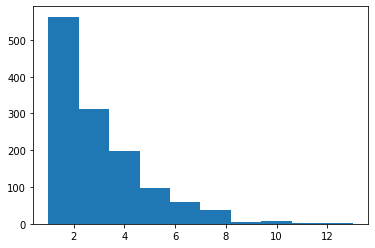

In [133]:
df[df.female == 1].nPregnancies.hist()
plt.grid(False)

In [134]:
df[(df.female==1) & (df.nPregnancies.isna())].shape[0]

1370

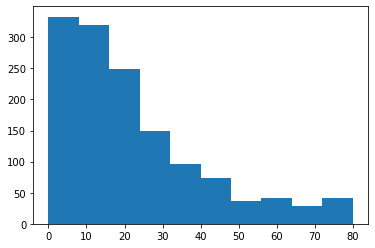

In [135]:
df[(df.female==1) & (df.nPregnancies.isna())].Age.hist()
plt.grid()

We could set nPregnancies as 0 if the girl is younger than 20yo, and fill by probability the rest.

Is any guy pregnant?

In [136]:
df[df.female==0].nPregnancies.value_counts()

Series([], Name: nPregnancies, dtype: int64)

No guy is pregnant!

#### nBabies ####

Let's check correlation with number of pregnancies.

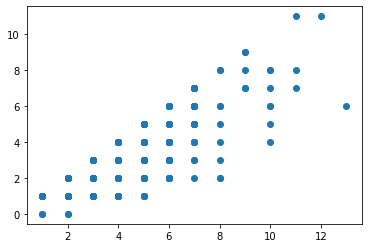

In [137]:
plt.scatter(df.nPregnancies, df.nBabies)

We see some abortions. I believe the number of pregnancies generates more information. We could also create a feature for the number of abortions and ignore nBabies.

In [138]:
df[(df.female == 1) & df.nBabies.isna()].shape[0]

1471

#### Age1stBaby ####

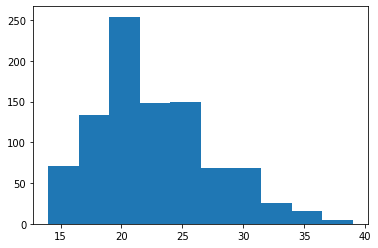

In [139]:
df[df.female==1].Age1stBaby.hist()
plt.grid(False)

In [140]:
df[(df.female==1) & (df.Age1stBaby.isna())].shape[0]

1712

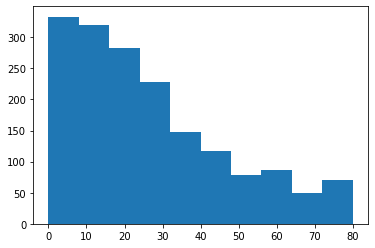

In [141]:
df[(df.female==1) & (df.Age1stBaby.isna())].Age.hist()
plt.grid(False)

We could ignore this attribute, or fill it with probability if the woman has had a baby.

#### SleepHrsNight ####

In [142]:
df.SleepHrsNight.describe()

count    3879.000000
mean        6.913895
std         1.356630
min         2.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        12.000000
Name: SleepHrsNight, dtype: float64

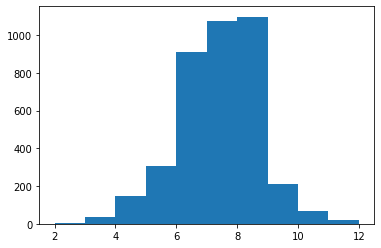

In [143]:
df.SleepHrsNight.hist()
plt.grid(False)

In [144]:
df[df.SleepHrsNight.isna()].shape[0]

1367

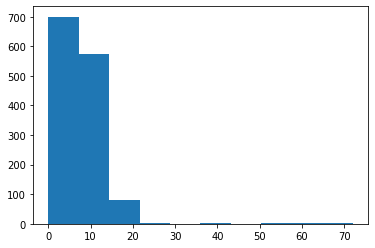

In [145]:
df[df.SleepHrsNight.isna()].Age.hist()
plt.grid(False)

Mostly missing for very young people. We can fill in some values from the internet maybe.

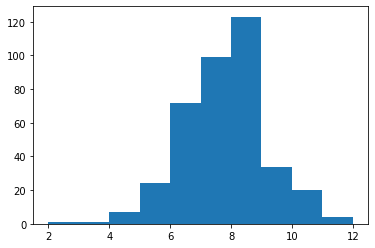

In [146]:
df[df.Age <= 20].SleepHrsNight.hist()
plt.grid(False)

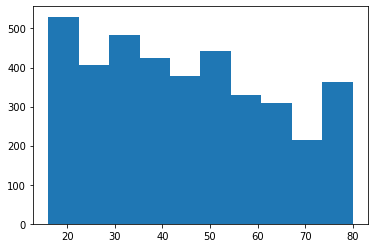

In [147]:
df[df.SleepHrsNight.notna()].Age.hist()
plt.grid(False)

#### SleepTrouble ####

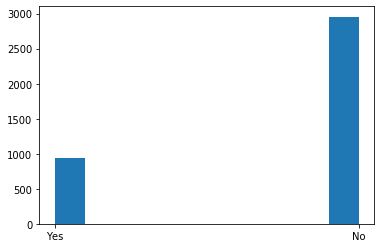

In [148]:
df.SleepTrouble.hist()
plt.grid(False)

In [149]:
df[df.SleepTrouble.isna()].shape[0]

1356

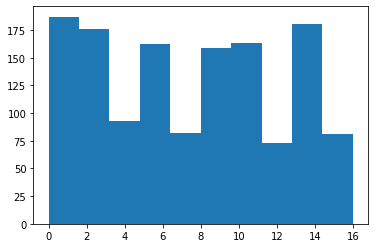

In [150]:
df[df.SleepTrouble.isna()].Age.hist()
plt.grid(False)

Missing values for people younger than 16yo.

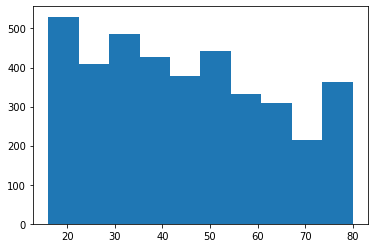

In [151]:
df[df.SleepTrouble.notna()].Age.hist()
plt.grid(False)

#### PhysActive ####

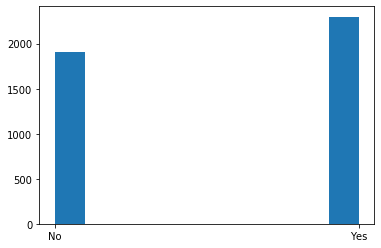

In [152]:
df.PhysActive.hist()
plt.grid(False)

In [153]:
df[df.PhysActive.isna()].shape[0]

1042

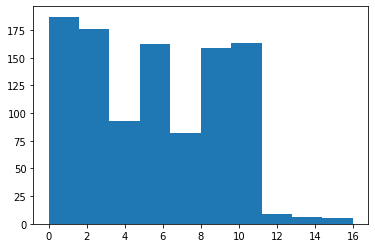

In [154]:
df[df.PhysActive.isna()].Age.hist()
plt.grid(False)

Only missing for very young people. They are kids, so we may assume they ar physically active.

#### PhysActiveDays ####

In [155]:
df.PhysActiveDays.describe()

count    2374.000000
mean        3.747683
std         1.850486
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: PhysActiveDays, dtype: float64

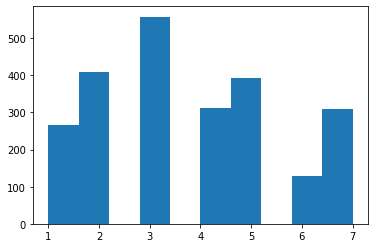

In [156]:
df.PhysActiveDays.hist()
plt.grid(False)

In [157]:
df[df.PhysActiveDays.isna()].shape[0]

2872

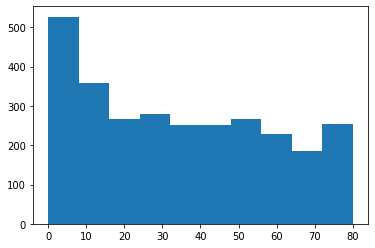

In [158]:
df[df.PhysActiveDays.isna()].Age.hist()
plt.grid(False)

Missing values for all age values. Filling through distribution does not seem feasible, plus there are many missing values.

#### TVHrsDay / TVHrsDayChild ####

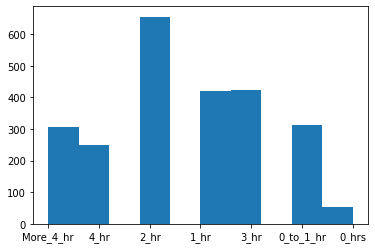

In [159]:
df.TVHrsDay.hist()
plt.grid(False)

In [160]:
df[df.TVHrsDay.isna()].shape[0]

2829

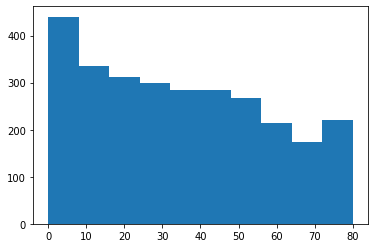

In [161]:
df[df.TVHrsDay.isna()].Age.hist()
plt.grid(False)

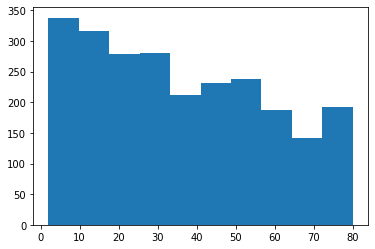

In [162]:
df[df.TVHrsDay.notna()].Age.hist()
plt.grid(False)

In [163]:
df.TVHrsDayChild.describe()

count    417.000000
mean       1.966427
std        1.400146
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: TVHrsDayChild, dtype: float64

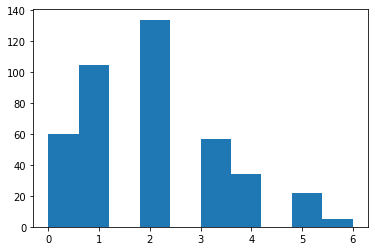

In [164]:
df.TVHrsDayChild.hist()
plt.grid(False)

In [165]:
df.TVHrsDayChild.unique()

array([nan,  5.,  1.,  4.,  0.,  6.,  3.,  2.])

We could merge both columns keeping the categories in `TVHrsDay`

In [166]:
df[(df.TVHrsDay.isna()) & (df.TVHrsDayChild.isna())].shape[0]

2412

A lot of entries with values for both attributes missing. We should drop them out.

#### CompHrsDay / CompHrsDayChild ####

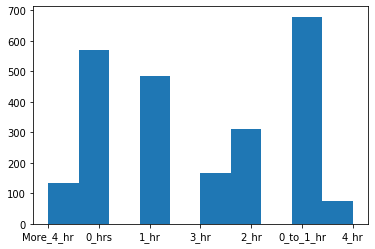

In [167]:
df.CompHrsDay.hist()
plt.grid(False)

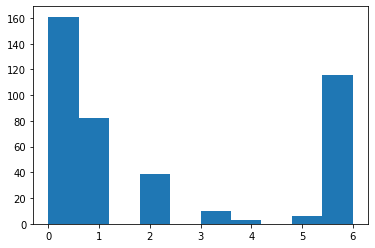

In [168]:
df.CompHrsDayChild.hist()
plt.grid(False)

In [169]:
df.CompHrsDayChild.unique()

array([nan,  0.,  6.,  3.,  1.,  2.,  5.,  4.])

In [170]:
df[(df.CompHrsDay.isna()) & (df.CompHrsDayChild.isna())].shape[0]

2410

Many missing values, either merge and fill based on probability, or not take into account.

#### Alcohol12PlusYr ####

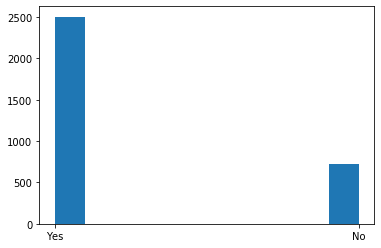

In [171]:
df.Alcohol12PlusYr.hist()
plt.grid(False)

In [172]:
df[df.Alcohol12PlusYr.isna()].shape[0]

2014

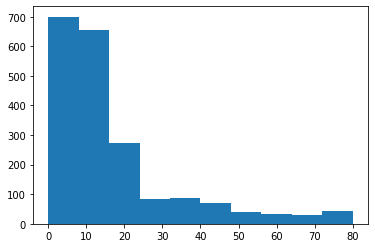

In [173]:
df[df.Alcohol12PlusYr.isna()].Age.hist()
plt.grid(False)

Missing mostly for young people. We can assume that until 16 they don't have alcohol, and if they are >= 16 then use the probabilities above.

#### AlcoholDay ####

In [174]:
df.AlcoholDay.describe()

count    2404.000000
mean        2.959651
std         3.522538
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        82.000000
Name: AlcoholDay, dtype: float64

In [175]:
df.AlcoholDay.unique()

array([nan,  2.,  3.,  1.,  6., 12.,  4.,  5.,  7., 20.,  8., 10., 16.,
       15., 13., 36., 24.,  9., 82., 64., 30., 18., 11., 21., 14.])

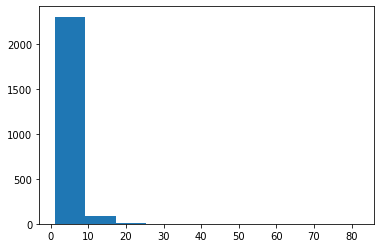

In [176]:
df.AlcoholDay.hist()
plt.grid(False)

In [177]:
df[df.AlcoholDay.isna()].shape[0]

2842

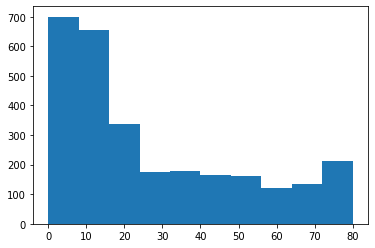

In [178]:
df[df.AlcoholDay.isna()].Age.hist()
plt.grid(False)

Missing for all ages. Below 16, put a 0. Otherwise, if they are doing alcohol (`Alcohol12PlusYr`) put somethong according to probabilities above, and if not just put 0.

#### AlcoholYear ####

In [179]:
df.AlcoholYear.describe()

count    2882.000000
mean       72.353921
std       101.779814
min         0.000000
25%         3.000000
50%        24.000000
75%       104.000000
max       364.000000
Name: AlcoholYear, dtype: float64

In [180]:
df.AlcoholYear.unique()

array([  0.,  20.,  nan,  52., 100., 104., 364.,  12., 312., 156.,   5.,
         1., 183.,   3., 200.,   2., 260.,  24., 208.,  14.,   9.,  36.,
        60.,   6.,   4.,  96.,  30.,  48.,  72., 300., 180.,   8.,   7.,
        65., 240.,  25.,  10.,  90.,  13., 270.,  84.,  28., 168.,  15.,
        56., 108., 288., 144., 120.,  35., 360., 182.,  40., 220., 138.,
        45.])

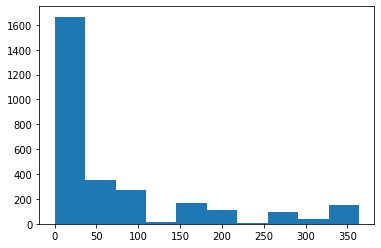

In [181]:
df.AlcoholYear.hist()
plt.grid(False)

In [182]:
df[df.AlcoholYear.isna()].shape[0]

2364

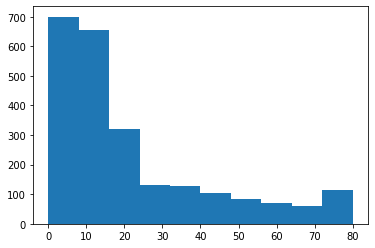

In [183]:
df[df.AlcoholYear.isna()].Age.hist()
plt.grid(False)

Missing for young people mainly. We could fill it as well as the last alcohol variables. However, using all of them for the predictor may not be benefitial, because too many filled NaNs.

#### SmokeNow ####

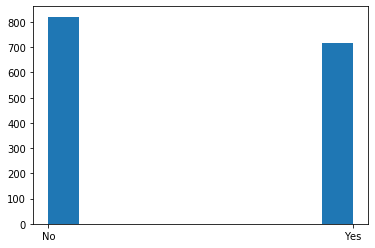

In [184]:
df.SmokeNow.hist()
plt.grid(False)

In [185]:
df[df.SmokeNow.isna()].shape[0]

3707

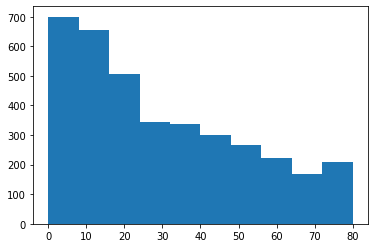

In [186]:
df[df.SmokeNow.isna()].Age.hist()
plt.grid(False)

Too many missing values, we may as well just ignore this variable.

#### Smoke100 ####

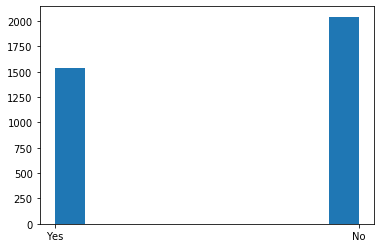

In [187]:
df.Smoke100.hist()
plt.grid(False)

In [188]:
df[df.Smoke100.isna()].shape[0]

1665

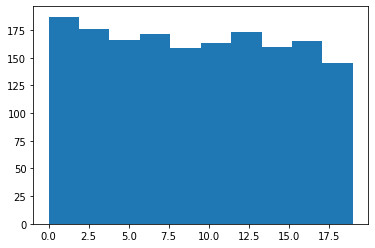

In [189]:
df[df.Smoke100.isna()].Age.hist()
plt.grid(False)

Missing for very young people, we can fill it as *No*.

#### Smoke100n ####

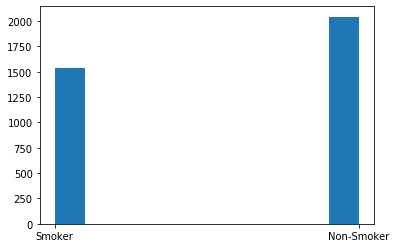

In [190]:
df.Smoke100n.hist()
plt.grid(False)

In [191]:
df[df.Smoke100n.isna()].shape[0]

1665

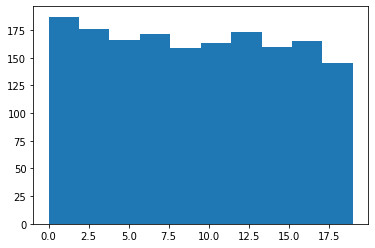

In [192]:
df[df.Smoke100n.isna()].Age.hist()
plt.grid(False)

In [193]:
df[(df.Smoke100n.isna()) | (df.Smoke100.isna())].shape[0]

1665

Same entries are missing as `Smoke100`, we can just classify every missing as *Non-smoker*. I don't know if we should use both `Smoke100` and `Smoke100n`, or would be enough with `Smoke100`.

#### SmokeAge ####

In [194]:
df.SmokeAge.describe()

count    1479.000000
mean       17.939148
std         5.452497
min         6.000000
25%        15.000000
50%        17.000000
75%        19.000000
max        72.000000
Name: SmokeAge, dtype: float64

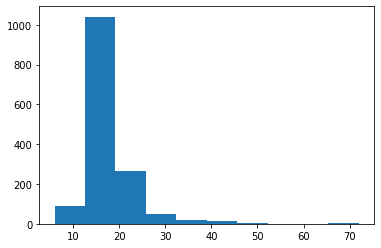

In [195]:
df.SmokeAge.hist()
plt.grid(False)

In [196]:
df[df.SmokeAge.isna()].shape[0]

3767

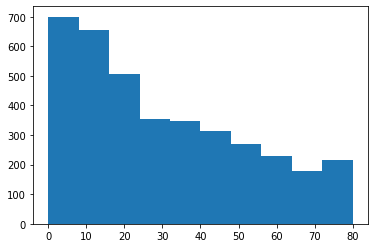

In [197]:
df[df.SmokeAge.isna()].Age.hist()
plt.grid(False)

A lot of values missing, we might as well just discard this attribute.

#### Marijuana ####

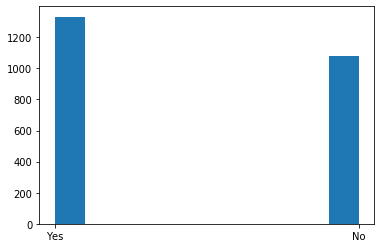

In [198]:
df.Marijuana.hist()
plt.grid(False)

In [199]:
df[df.Marijuana.isna()].shape[0]

2835

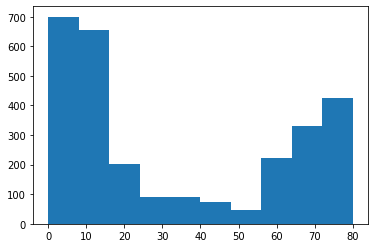

In [200]:
df[df.Marijuana.isna()].Age.hist()
plt.grid(False)

We could do the same thing as with alcohol. Assume no if the person is <= 16 yo. Otherwise follow the probabilities above.

#### AgeFirstMarij ####

In [201]:
df.AgeFirstMarij.describe()

count    1331.000000
mean       16.983471
std         3.874501
min         1.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        48.000000
Name: AgeFirstMarij, dtype: float64

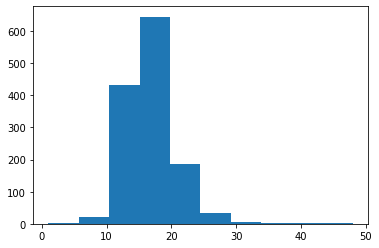

In [202]:
df.AgeFirstMarij.hist()
plt.grid(False)

In [203]:
df[df.AgeFirstMarij.isna()].shape[0]

3915

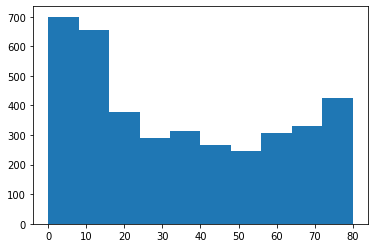

In [204]:
df[df.AgeFirstMarij.isna()].Age.hist()
plt.grid(False)

Many many values missing, I would ignore this attribute.

#### RegularMarij ####

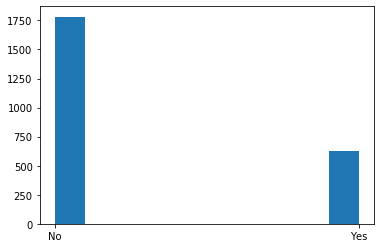

In [205]:
df.RegularMarij.hist()
plt.grid(False)

In [206]:
df[df.RegularMarij.isna()].shape[0]

2835

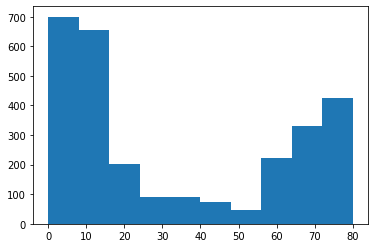

In [207]:
df[df.RegularMarij.isna()].Age.hist()
plt.grid(False)

Again, if the person is <= 16 yo, say no, otherwise use probabilities.

#### AgeRegMarij ####

In [208]:
df.AgeRegMarij.describe()

count    629.000000
mean      17.545310
std        4.478533
min        5.000000
25%       15.000000
50%       17.000000
75%       19.000000
max       52.000000
Name: AgeRegMarij, dtype: float64

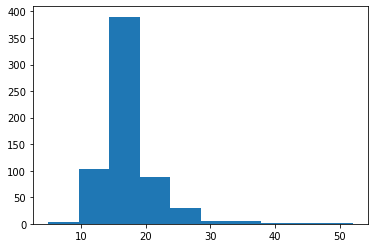

In [209]:
df.AgeRegMarij.hist()
plt.grid(False)

In [210]:
df[df.AgeRegMarij.isna()].shape[0]

4617

Missing for almost everyone, just discard the attribute.

#### HardDrugs ####

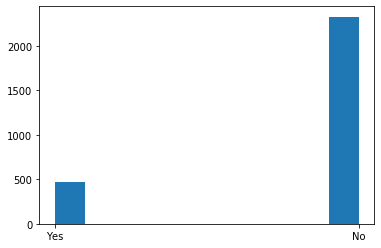

In [211]:
df.HardDrugs.hist()
plt.grid(False)

In [212]:
df[df.HardDrugs.isna()].shape[0]

2448

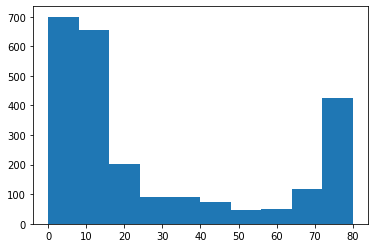

In [213]:
df[df.HardDrugs.isna()].Age.hist()
plt.grid(False)

Missing mainly for youngsters and old adults. Assume no for <= 16 yo and use probabilities for rest.

#### SexEver ####

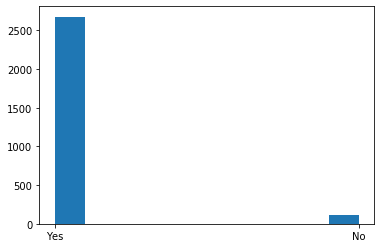

In [214]:
df.SexEver.hist()
plt.grid(False)

In [215]:
df[df.SexEver.isna()].shape[0]

2450

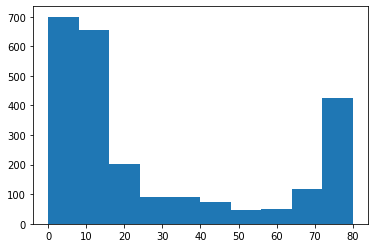

In [216]:
df[df.SexEver.isna()].Age.hist()
plt.grid(False)

Assume no for <= 16yo and otherwise use probability.

#### SexAge ####

In [217]:
df.SexAge.describe()

count    2673.000000
mean       17.456042
std         3.740811
min         9.000000
25%        15.000000
50%        17.000000
75%        19.000000
max        50.000000
Name: SexAge, dtype: float64

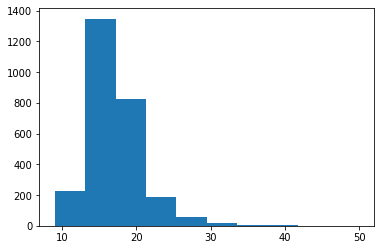

In [218]:
df.SexAge.hist()
plt.grid(False)

In [219]:
df[df.SexAge.isna()].shape[0]

2573

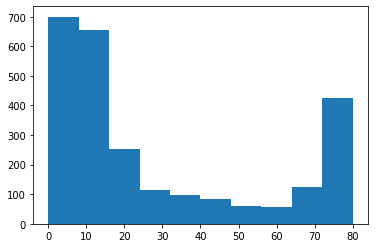

In [220]:
df[df.SexAge.isna()].Age.hist()
plt.grid(False)

May not be a good idea to use this attribute. What value do we give if `SexEver` is no? Anyway, we can give that value if <= 16yo, otherwise use probability.

#### SexNumPartnLife ####

In [221]:
df.SexNumPartnLife.describe()

count    2773.000000
mean       14.617021
std        61.385945
min         0.000000
25%         2.000000
50%         5.000000
75%        12.000000
max      2000.000000
Name: SexNumPartnLife, dtype: float64

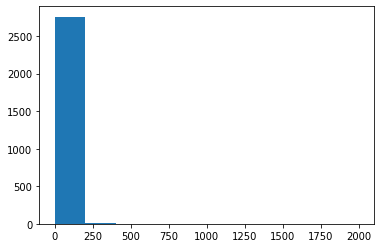

In [222]:
df.SexNumPartnLife.hist()
plt.grid(False)

In [223]:
df[df.SexNumPartnLife.isna()].shape[0]

2473

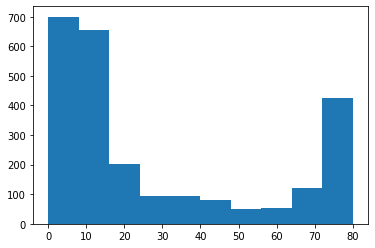

In [224]:
df[df.SexNumPartnLife.isna()].Age.hist()
plt.grid(False)

How do we fill this in? DO we build a predictor based on age or something if `SexEver` is true? We could also ignore this.

#### SexNumPartYear ####

In [225]:
df.SexNumPartYear.describe()

count    2405.000000
mean        1.354678
std         2.503281
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        69.000000
Name: SexNumPartYear, dtype: float64

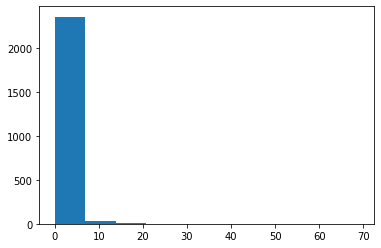

In [226]:
df.SexNumPartYear.hist()
plt.grid(False)

In [227]:
df[df.SexNumPartYear.isna()].shape[0]

2841

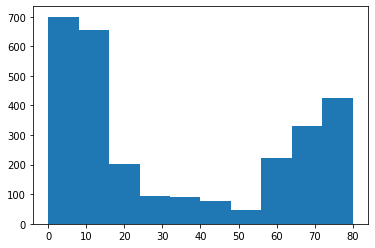

In [228]:
df[df.SexNumPartYear.isna()].Age.hist()
plt.grid(False)

Again, how do we fill this in? Based on probs taking into account the total number of partners or something.

#### SameSex ####

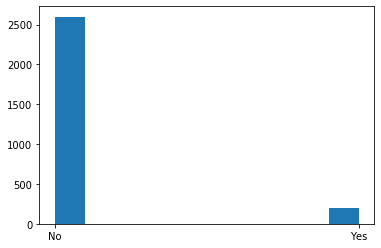

In [229]:
df.SameSex.hist()
plt.grid(False)

In [230]:
df[df.SameSex.isna()].shape[0]

2448

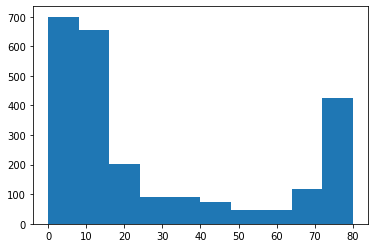

In [231]:
df[df.SameSex.isna()].Age.hist()
plt.grid(False)

Fill based on probabilities, taking into account `SexEver` and <= 16 yo things.

#### SexOrientation ####

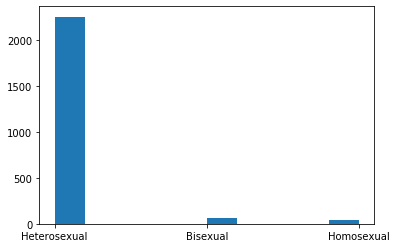

In [232]:
df.SexOrientation.hist()
plt.grid(False)

In [233]:
df[df.SexOrientation.isna()].shape[0]

2889

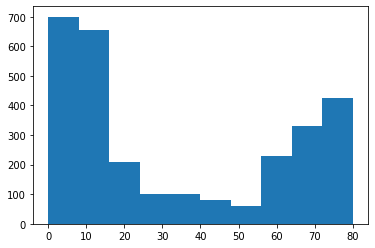

In [234]:
df[df.SexOrientation.isna()].Age.hist()
plt.grid(False)

We can include a *DontKnow* category for <= 16 yo. And the rest fill by probabilities.

#### PregnantNow ####

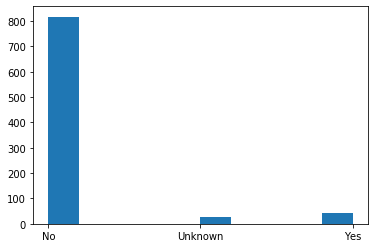

In [235]:
df.PregnantNow.hist()
plt.grid(False)

In [236]:
df[df.PregnantNow.isna()].shape[0]

4363

In [237]:
df[(df.PregnantNow.isna()) & (df.female == 1)].shape[0]

1770

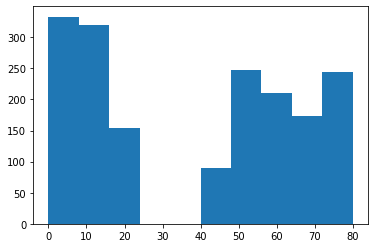

In [238]:
df[(df.PregnantNow.isna()) & (df.female == 1)].Age.hist()
plt.grid(False)

Fill in all men as not pregnant. If a woman is <= 20 or >= 50 fill her as no. Otherwise, use the probabilities above.

# Done with attribute analysis! #